In [1]:
!pip install chainconsumer 
!pip install camb

  Using cached ChainConsumer-0.34.0-py3-none-any.whl
  Using cached camb-1.4.0-py3-none-any.whl
  Using cached sympy-1.11.1-py3-none-any.whl (6.5 MB)


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import camb
from camb import model, initialpower
from scipy import linalg
import matplotlib.pyplot as plt
from time import time
from chainconsumer import ChainConsumer

def sci(a): return "%.2e"%a

def define_plot_resolution():
    fig = plt.gcf()

    DPI = fig.get_dpi()
    fig.set_size_inches(12, 8)
    ax = plt.gca()
    for tickLabel in ax.get_xticklabels()+ax.get_yticklabels():
        tickLabel.set_fontsize(22)
    ax.yaxis.label.set_size(22)
    ax.xaxis.label.set_size(22)
    ax.yaxis.offsetText.set_fontsize(22)
    ax.xaxis.offsetText.set_fontsize(22)
    return

plt.rcParams['figure.figsize'] = 16, 10


# Fisher

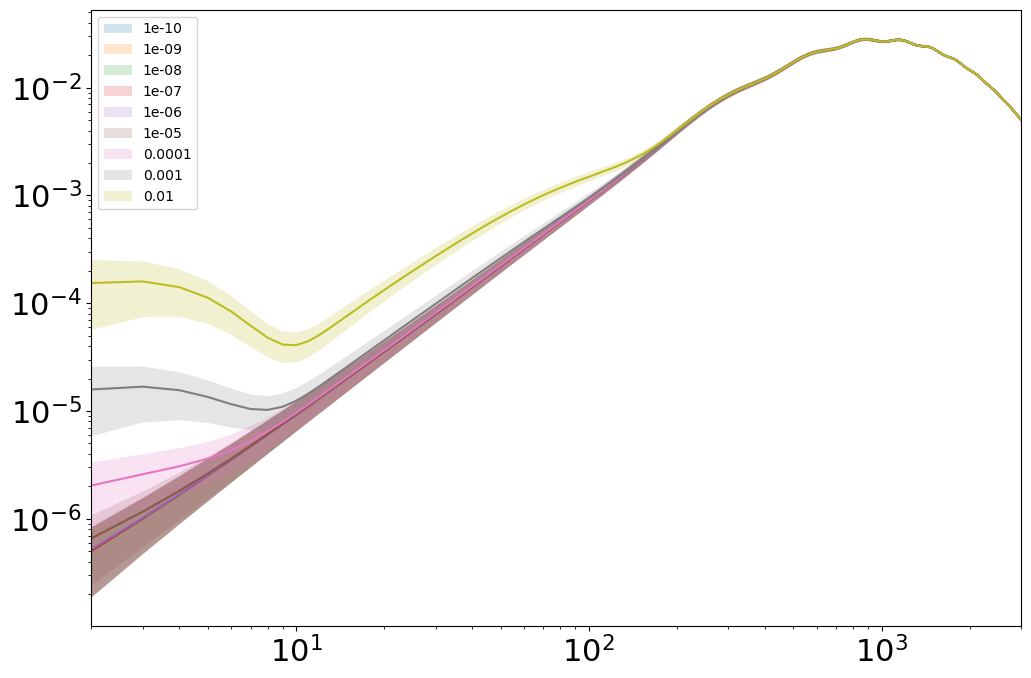

In [6]:
def spectra_naive(As, ns, r, H0, ombh2, omch2, mnu, omk, nt, tau, nsrun, Neff, lmax, lensing, mode): # to add : thetastar, ctheta, delta_redshift

    pars = camb.CAMBparams()
    if r > 0 : pars.WantTensors = True
    pars.set_cosmology(H0=H0, ombh2=ombh2, omch2=omch2, mnu=mnu, omk=omk, tau=tau, nnu = Neff)
    pars.InitPower.set_params(As=As, ns=ns, r=r, nt=nt, nrun=nsrun)
    pars.set_for_lmax(lmax, lens_potential_accuracy=1);
    pars.max_l_tensor = lmax
    results = camb.get_results(pars)
    if lensing == 1: cl = results.get_total_cls(lmax, CMB_unit='muK')
    else: cl = lensing*results.get_total_cls(lmax, CMB_unit='muK') + (1-lensing)*results.get_unlensed_total_cls(lmax, CMB_unit='muK')
    return cl.T[mode, 2:lmax]

def spectra(As, ns, r, H0, ombh2, omch2, mnu, omk, nt, tau, nsrun, Neff, lmax, lensing, mode): # to add : thetastar, ctheta, delta_redshift

    pars = camb.CAMBparams()
    if r > 0 : pars.WantTensors = True
    pars.set_cosmology(H0=H0, ombh2=ombh2, omch2=omch2, mnu=mnu, omk=omk, tau=tau, nnu = Neff, Alens=lensing)
    pars.InitPower.set_params(As=As, ns=ns, r=r, nt=nt, nrun=nsrun)
    pars.set_for_lmax(lmax, lens_potential_accuracy=1);
    pars.max_l_tensor = lmax
#    pars.set_dark_energy(w=w0, wa=wa, cs2=cs2,dark_energy_model=de)
#    pars.ReionizationModel.set_tau()
    results = camb.get_results(pars)
    cl = results.get_total_cls(lmax, CMB_unit='muK')
    return cl.T[mode, 2:lmax]




test=True

if test:
    As, ns, r, H0, ombh2, omch2, mnu, omk, tau, nsrun, Neff, lmax, lensing, mode, nt =  2e-9, 0.9665, 0.001, 67.5, 0.022, 0.122, 0.06, 0, 0.06, 1e-4,  3.046, 3000, 0.3,  [0,1,2,3],  -0.001/8
    
    #a = spectra(As, ns, r, H0, ombh2, omch2, mnu, omk, nt, tau, lmax, lensing, mode)
    #print(np.shape(a))
    #for b in a: 
    #    plt.plot(b)
    
    
    #plt.figure()
    #r = 0.01
    #for j, lensing in enumerate([0, 0.5, 0.75, 1, 1.25, 1.5]):
    #    a = spectra(As, ns, r, H0, ombh2, omch2, mnu, omk, nt, tau, nsrun, Neff, lmax, lensing, mode)
    #    plt.plot(np.arange(2,lmax), a[2], ls = '-', label = f'$A_\ell = ${lensing}', lw = 2)
    #    b = spectra_naive(As, ns, r, H0, ombh2, omch2, mnu, omk, nt, tau, nsrun, Neff, lmax, lensing, mode)
    #    plt.plot(np.arange(2,lmax), b[2], ls = (0, (1, 5)), color = 'k', lw = 2)
    #        #plt.fill_between(np.arange(2,lmax), (1 - np.sqrt(2/(2*np.arange(2,lmax)+1)))*a[2], (1 + np.sqrt(2/(2*np.arange(2,lmax)+1)))*a[2], alpha = 0.2, label = f'{lensing}')
    #plt.plot([], [], ls = '-', color = 'k', label = 'CAMB', lw = 2)
    #plt.plot([], [], ls = (0, (1, 5)), color = 'k', label = r'$A_\ell*C_\ell^{len}+(1-A_\ell)*C_\ell^{unlen}$', lw = 2)
    #plt.xlim(2,1000)
    #plt.ylim(1e-5, 1)
    #plt.loglog()
    #plt.legend(fontsize = 15)
    #plt.ylabel(r'$C_\ell$')
    #plt.xlabel(r'$\ell$')
    #define_plot_resolution()
    #
    #plt.figure()
    #r = 0.01
    #for lensing in [0, 0.5, 0.75, 1, 1.25, 1.5]:
    #    a = spectra(As, ns, r, H0, ombh2, omch2, mnu, omk, nt, tau, nsrun, Neff, lmax, lensing, mode)
    #    b = spectra_naive(As, ns, r, H0, ombh2, omch2, mnu, omk, nt, tau, nsrun, Neff, lmax, lensing, mode)
    #    plt.plot(np.arange(2,lmax), abs((a-b)/b)[2], label = f'$A_\ell = ${lensing}', lw = 2)
    #plt.xlim(2,1000)
    #plt.ylim(1e-6, 1)
    #plt.legend(fontsize = 15)
    #plt.loglog()
    #plt.xlabel(r'$\ell$')
    #plt.ylabel(r'$\left|\frac{Plain - Dotted}{Dotted}\right|$')
    #define_plot_resolution()
    
    
    plt.figure()
    for r in [1e-10,1e-9,1e-8,1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,]: 
    #for nt in [0,0.1,0.2]: 
        a = spectra(As, ns, r, H0, ombh2, omch2, mnu, omk, nt, tau, nsrun, Neff, lmax, lensing, mode)
        plt.plot(np.arange(2,lmax), a[2])
        plt.fill_between(np.arange(2,lmax), (1 - np.sqrt(2/(2*np.arange(2,lmax)+1)))*a[2], (1 + np.sqrt(2/(2*np.arange(2,lmax)+1)))*a[2], alpha = 0.2, label = f'{r}')
    plt.xlim(2,lmax)
    plt.loglog()
    plt.legend()
    define_plot_resolution()



def der_spectra(wrt, As, ns, r, H0, ombh2, omch2, mnu, omk, nt, tau, nsrun, Neff, lmax, mode, lensing):
    if wrt == 'As':
        deltaAs = As/100
        return (spectra(As+deltaAs, ns, r, H0, ombh2, omch2, mnu, omk, nt, tau, nsrun, Neff, lmax, lensing, mode) - spectra(As-deltaAs, ns, r, H0, ombh2, omch2, mnu, omk, nt, tau, nsrun, Neff, lmax, lensing, mode))/(2*deltaAs)
    elif wrt == 'ns':
        deltans = ns/100
        return (spectra(As, ns+deltans, r, H0, ombh2, omch2, mnu, omk, nt, tau, nsrun, Neff, lmax, lensing, mode) - spectra(As, ns-deltans, r, H0, ombh2, omch2, mnu, omk, nt, tau, nsrun, Neff, lmax, lensing, mode))/(2*deltans)
    elif wrt == 'r':
        deltar = 1e-6
        return (spectra(As, ns, r+deltar, H0, ombh2, omch2, mnu, omk, nt, tau, nsrun, Neff, lmax, lensing, mode) - spectra(As, ns, r-deltar, H0, ombh2, omch2, mnu, omk, nt, tau, nsrun, Neff, lmax, lensing, mode))/(2*deltar)
    elif wrt == 'H0':
        deltaH0 = H0/100
        return (spectra(As, ns, r, H0+deltaH0, ombh2, omch2, mnu, omk, nt, tau, nsrun, Neff, lmax, lensing, mode) - spectra(As, ns, r, H0-deltaH0, ombh2, omch2, mnu, omk, nt, tau, nsrun, Neff, lmax, lensing, mode))/(2*deltaH0)
    elif wrt == 'ombh2':
        deltaombh2 = ombh2/100
        return (spectra(As, ns, r, H0, ombh2+deltaombh2, omch2, mnu, omk, nt, tau, nsrun, Neff, lmax, lensing, mode) - spectra(As, ns, r, H0, ombh2-deltaombh2, omch2, mnu, omk, nt, tau, nsrun, Neff, lmax, lensing, mode))/(2*deltaombh2)
    elif wrt == 'omch2':
        deltaomch2 = omch2/100
        return (spectra(As, ns, r, H0, ombh2, omch2+deltaomch2, mnu, omk, nt, tau, nsrun, Neff, lmax, lensing, mode) - spectra(As, ns, r, H0, ombh2, omch2-deltaomch2, mnu, omk, nt, tau, nsrun, Neff, lmax, lensing, mode))/(2*deltaomch2)
    elif wrt == 'mnu':
        deltamnu = 1e-7
        return (spectra(As, ns, r, H0, ombh2, omch2, mnu+deltamnu, omk, nt, tau, nsrun, Neff, lmax, lensing, mode) - spectra(As, ns, r, H0, ombh2, omch2, mnu-deltamnu, omk, nt, tau, nsrun, Neff, lmax, lensing, mode))/(2*deltamnu)
    elif wrt == 'omk':
        deltaomk = omk/100
        return (spectra(As, ns, r, H0, ombh2, omch2, mnu, omk+deltaomk, nt, tau, nsrun, Neff, lmax, lensing, mode) - spectra(As, ns, r, H0, ombh2, omch2, mnu, omk-deltaomk, nt, tau, nsrun, Neff, lmax, lensing, mode))/(2*deltaomk)
    elif wrt == 'nt':
        deltant = 1e-7
        return (spectra(As, ns, r, H0, ombh2, omch2, mnu, omk, nt+deltant, tau, nsrun, Neff, lmax, lensing, mode) - spectra(As, ns, r, H0, ombh2, omch2, mnu, omk, nt-deltant, tau, nsrun, Neff, lmax, lensing, mode))/(2*deltant)
    elif wrt == 'tau':
        deltatau = tau/100
        return (spectra(As, ns, r, H0, ombh2, omch2, mnu, omk, nt, tau+deltatau, nsrun, Neff, lmax, lensing, mode) - spectra(As, ns, r, H0, ombh2, omch2, mnu, omk, nt, tau-deltatau, nsrun, Neff, lmax, lensing, mode))/(2*deltatau)
    elif wrt == 'nsrun':
        deltansrun = 1e-8
        return (spectra(As, ns, r, H0, ombh2, omch2, mnu, omk, nt, tau, nsrun+deltansrun, Neff, lmax, lensing, mode) - spectra(As, ns, r, H0, ombh2, omch2, mnu, omk, nt, tau, nsrun-deltansrun, Neff, lmax, lensing, mode))/(2*deltansrun)
    elif wrt == 'Neff':
        deltaNeff = Neff/100
        return (spectra(As, ns, r, H0, ombh2, omch2, mnu, omk, nt, tau, nsrun, Neff+deltaNeff, lmax, lensing, mode) - spectra(As, ns, r, H0, ombh2, omch2, mnu, omk, nt, tau, nsrun, Neff-deltaNeff, lmax, lensing, mode))/(2*deltaNeff)
    else:
        raise TypeError("Unknown param") 


def residual_guess(l, sensitivity_nu_T, sensitivity_nu_P, theta_nu, mode, residual_fg = False):
    
    # spectre resi fg
    if residual_fg:
        if mode == 0: Nl_fg = 1e-2*l**(-2.)
        elif mode == 1: Nl_fg = 1e-2*l**(-2.)
        elif mode == 3: Nl_fg = 1e-2*l**(-2.)
        elif mode == 2: Nl_fg = 5e-7*l**(-2.)
    else: Nl_fg = 0*l
    
    # spectre bruit
    if mode == 0:
        if type(sensitivity_nu_T) != np.ndarray or type(theta_nu) != np.ndarray: 
            Nl_instr = np.zeros((len(l)))
        else:
            sensitivity_nu = np.pi/(180*60)*sensitivity_nu_T
            theta_nu = np.pi/(180*60)*theta_nu
            wXnu = sensitivity_nu**-2
            Nl_instr = 1/np.sum(wXnu[:,np.newaxis]*np.exp(-(l*(l+1))[np.newaxis, :]*theta_nu[:,np.newaxis]**2/(8*np.log(2))), axis = 0)
    
    if mode in [1, 2]:
        if type(sensitivity_nu_P) != np.ndarray or type(theta_nu) != np.ndarray: 
            Nl_instr = np.zeros((len(l)))
        else:
            sensitivity_nu = np.pi/(180*60)*sensitivity_nu_P
            theta_nu = np.pi/(180*60)*theta_nu
            wXnu = sensitivity_nu**-2
            Nl_instr = 1/np.sum(wXnu[:,np.newaxis]*np.exp(-(l*(l+1))[np.newaxis, :]*theta_nu[:,np.newaxis]**2/(8*np.log(2))), axis = 0)
    
    if mode == 3:
        Nl_instr = np.zeros((len(l)))
    
    
    return l*(l+1)/(2*np.pi)*(Nl_fg+Nl_instr)


def verbose_fisher(Cl, Nl, params, lmax, dic_fskys, mode, l, lensing):
    n=len(l)
    print('Fisher forecast assuming:\n\nFiducial:',end='\t')
    for key in dic_fid:
        print(key+f' = {dic_fid[key]}', end=', ')
    print(end = '\nParameters:\t')
    for param in params :
        print(end=param+', ')
    print('\nModes:', end = '\t')
    for mode_ in mode :
        print(end=f'\t{dic_mode[mode_]}, ')
    print('\nfsky:\t', end = '')
    for mode_ in mode :
        print(end=f'\t{dic_fskys[mode_]}, ')
    print(f'\nlmax:\t\t{lmax},')
    print(f'Delensing:\t{lensing},')
    print('Noise level:\t')

    plt.figure()
    for i in range(len(mode)):
        plt.plot(l, Cl[i*n:(i+1)*n], color = C[i])
        plt.fill_between(l, Cl[i*n:(i+1)*n]-np.sqrt(2/(2*l+1))*Cl[i*n:(i+1)*n]/2, Cl[i*n:(i+1)*n]+np.sqrt(2/(2*l+1))*Cl[i*n:(i+1)*n]/2, color = C[i], alpha=0.2, label=dic_mode[mode[i]])
        plt.plot(l, Nl[i*n:(i+1)*n], color = C[i], ls = ':')
    plt.loglog()
    plt.xlim(2, lmax+1)
    plt.legend(fontsize = 22)
    define_plot_resolution()
    plt.show()
    

#def fisher_simplified(params = ['r', 'nt'], dic_fskys={0:1, 1:1, 2:1, 3:1}, As=2e-9, ns=0.9665, r=0.001, H0=67.5, ombh2=0.022, omch2=0.122, mnu=0.06, omk=0.00001, nt=-0.001/8, tau=0.06, nsrun=1e-4, Neff=3.046,  lmax=3000, lensing=1, mode = [0,1,2,3], theta_nu = None, sensitivity_nu_T = None, sensitivity_nu_P = None, verbose=True): # 1 mode for now
#    
#    l=np.arange(2, lmax)
#    n = len(l)
#    tic = time()
#    Nl = np.concatenate([residual_guess(l, sensitivity_nu_T, sensitivity_nu_P, theta_nu, mode_) for mode_ in mode]) # même bruit/resid pour E ou B...
#    Cl = np.ravel(spectra(As, ns, r, H0, ombh2, omch2, mnu, omk, nt, tau, nsrun, Neff, lmax, lensing, mode))
#    fsky = np.concatenate(([np.full(n, dic_fskys[mode]) for mode in mode]))
#
#    if verbose: verbose_fisher(Cl, Nl, params, lmax, dic_fskys, mode, l, lensing)
#    
#    derCl = np.array([np.ravel(der_spectra(wrt1, As, ns, r, H0, ombh2, omch2, mnu, omk, nt, tau, nsrun, Neff, lmax, mode, lensing,)) for wrt1 in params])
#    mat = np.einsum('ik,jk->ijk', derCl, derCl)
#    prefac = np.tile((2*l+1)/2, len(mode))
#    fisher_mat = np.sum(prefac * fsky * mat / (Cl+Nl)**2, axis = 2)
#    print(f'Done in {round(time()-tic,2)} s.')
#
#    return fisher_mat


def Ccal_(l, Cl, mode):

    n = len(l)
    zer = np.zeros((n))
    C = {'TT':None, 'EE':None, 'BB':None, 'TE':None}
    for dicmode, i in zip(['TT', 'EE', 'BB', 'TE'], [0,1,2,3]):
        try : 
            C[dicmode] = Cl[mode.index(i)*n: (mode.index(i)+1)*n]
        except : 
            C[dicmode] = zer

    Ccal = 2/(2*l+1)*np.array([[C['TT']**2,       C['TE']**2,      zer,        C['TT']*C['TE']                 ],
                               [C['TE']**2,       C['EE']**2,      zer,        C['EE']*C['TE']                 ],
                               [zer,              zer,             C['BB']**2, zer                             ],
                               [C['TT']*C['TE'],  C['EE']*C['TE'], zer,        1/2*(C['TE']**2+C['TT']*C['EE'])]])
    
    mode_ = np.array(np.meshgrid(mode,mode))
    Ccal = Ccal[mode_[1], mode_[0]]
    return Ccal 
   
    
def fisher_full(params = ['r', 'nt'], dic_fskys={0:1, 1:1, 2:1, 3:1}, As=2e-9, ns=0.9665, r=0.001, H0=67.5, ombh2=0.022, omch2=0.122, mnu=0.06, omk=0.00001, nt=-0.001/8, tau=0.06, nsrun=1e-4, Neff=3.046,  lmax=3000, lensing=1, mode = [0,1,2,3], theta_nu = None, sensitivity_nu_T = None, sensitivity_nu_P = None, verbose=True, residual_fg = False):
    
    l=np.arange(2, lmax)
    n = len(l)
    tic = time()
    Nl = np.concatenate([residual_guess(l, sensitivity_nu_T, sensitivity_nu_P, theta_nu, mode_, residual_fg) for mode_ in mode]) # même bruit/resid pour E ou B...
    Cl = np.ravel(spectra(As, ns, r, H0, ombh2, omch2, mnu, omk, nt, tau, nsrun, Neff, lmax, lensing, mode))
    fsky = np.concatenate(([np.full(n, dic_fskys[mode]) for mode in mode]))

    if verbose: verbose_fisher(Cl, Nl, params, lmax, dic_fskys, mode, l, lensing)

    Cl = (Cl+Nl)/fsky
    Ccal = Ccal_(l, Cl, mode)
    Ccal_inv = np.linalg.inv(np.transpose(Ccal, (2,0,1)))
    

    derCl = np.array([der_spectra(wrt1, As, ns, r, H0, ombh2, omch2, mnu, omk, nt, tau, nsrun, Neff, lmax, mode, lensing,) for wrt1 in params])
    fisher_mat = np.einsum('iXl,lXY,jYl->ij', derCl, Ccal_inv, derCl)
    print(f'Done in {round(time()-tic,2)} s.')
    
    return fisher_mat

    
def print_res(dic_fid, dic_fskys, params=['As', 'ns', 'r', 'H0', 'ombh2', 'omch2', 'omk', 'mnu', 'nt', 'tau', 'nsrun', 'Neff'], fsky=1,  lmax=3000, lensing=1, mode = [0,1,2,3], theta_nu = None, sensitivity_nu_T = None, sensitivity_nu_P = None, verbose = False, residual_fg = False):
    
    name_params = [dic_name[param] for param in params]
    #Fish = fisher(params = params, dic_fskys = dic_fskys, As = dic_fid['As'], ns = dic_fid['ns'], r = dic_fid['r'], H0 = dic_fid['H0'], ombh2 = dic_fid['ombh2'], omch2 = dic_fid['omch2'], mnu = dic_fid['mnu'], omk = dic_fid['omk'], nt = dic_fid['nt'], tau = dic_fid['tau'], nsrun = dic_fid['nsrun'], Neff = dic_fid['Neff'], lmax = lmax, lensing = lensing, mode = mode, theta_nu = theta_nu, sensitivity_nu=sensitivity_nu, verbose=verbose)
    Fish = fisher_full(params = params, dic_fskys = dic_fskys, As = dic_fid['As'], ns = dic_fid['ns'], r = dic_fid['r'], H0 = dic_fid['H0'], ombh2 = dic_fid['ombh2'], omch2 = dic_fid['omch2'], mnu = dic_fid['mnu'], omk = dic_fid['omk'], nt = dic_fid['nt'], tau = dic_fid['tau'], nsrun = dic_fid['nsrun'], Neff = dic_fid['Neff'], lmax = lmax, lensing = lensing, mode = mode, theta_nu = theta_nu, sensitivity_nu_T=sensitivity_nu_T, sensitivity_nu_P=sensitivity_nu_P, verbose=verbose, residual_fg=residual_fg)
    invFish = linalg.inv(Fish)
    
    print('\nCorr matrix')
    corr = invFish/np.sqrt(np.einsum('i,j->ij', np.diag(invFish), np.diag(invFish)))
    plt.pcolor(corr[:,::-1], cmap = 'RdBu')
    plt.xticks(np.arange(0.5,len(params)+0.5,1), name_params)
    plt.yticks(np.arange(0.5,len(params)+0.5,1), name_params[::-1])
    plt.colorbar()
    define_plot_resolution()
    plt.show()    

    
    print('\nMarginal')
    vec_err = np.sqrt(np.diag(invFish))
    for param, err in zip(params, vec_err):
        print(param + '\t'+ sci(err))
        if param == 'Neff': print('omgwh2' + '\t'+ sci(5.6e-6*err))

    print('\nConditional')
    vec_err = 1/np.sqrt(np.diag(Fish))
    for param, err in zip(params, vec_err):
        print(param + '\t'+ sci(err))  
        if param == 'Neff': print('omgwh2' + '\t'+ sci(5.6e-6*err))

    print('\nCorner')
    plt.figure()
    c = ChainConsumer()
    mean = np.array([dic_fid[param] for param in params], dtype = float)
    c.add_covariance(mean, invFish, parameters=name_params, shade=False)
    c.configure(usetex=False, serif=False,sigma2d=True,sigmas=[1,2])
    fig = c.plotter.plot()
    fig.set_size_inches(3 + fig.get_size_inches()) 
    plt.show()




dic_name = {'As':r'$A_S$', 'ns':r'$n_S$', 'r':r'$r$', 'H0':r'$H_0$', 'ombh2':r'$\Omega_bh^2$', 'omch2':r'$\Omega_ch^2$', 'omk':r'$\Omega_k$', 'mnu':r'$m_\nu$', 'nt':r'$n_T$', 'tau':r'$\tau$', 'nsrun':r'$n_{S,run}$', 'Neff':r'$N_{eff}$'}
C = ['blue', 'red', 'green', 'yellow']
dic_mode = {0:'TT',1:'EE',2:'BB',3:'TE'} 
dic_fid = {'As':2e-9, 'ns':0.9665, 'r':0.001, 'H0':67.5, 'ombh2':0.022, 'omch2':0.122, 'mnu':0.06, 'omk':0.00001, 'nt':-0.001/8, 'tau':0.06, 'nsrun':0.0004, 'Neff':3.046}

#print(fish2(params = ['H0', 'ombh2', 'omch2', 'tau', 'omk', 'As', 'ns', 'nsrun', 'r', 'nt', 'Neff', 'mnu',], dic_fskys={0:1, 1:1, 2:1, 3:1}, As=2e-9, ns=0.9665, r=0.001, H0=67.5, ombh2=0.022, omch2=0.122, mnu=0.06, omk=0.00001, nt=-0.001/8, tau=0.06, nsrun=1e-4, Neff=3.046,  lmax=3000, lensing=1, mode = [0,1,2,3], theta_nu = None, sensitivity_nu = None, verbose=True))


### In 2050 : No noise, 0.3 delensed, full sky, lmax=8000

Fisher forecast assuming:

Fiducial:	As = 2e-09, ns = 0.9665, r = 0.001, H0 = 67.5, ombh2 = 0.022, omch2 = 0.122, mnu = 0.06, omk = 1e-05, nt = -0.000125, tau = 0.06, nsrun = 0.0004, Neff = 3.046, 
Parameters:	H0, ombh2, omch2, tau, As, ns, nsrun, r, nt, omk, Neff, mnu, 
Modes:		TT, 	EE, 	BB, 	TE, 
fsky:		1, 	1, 	1, 	1, 
lmax:		15000,
Delensing:	0.3,
Noise level:	


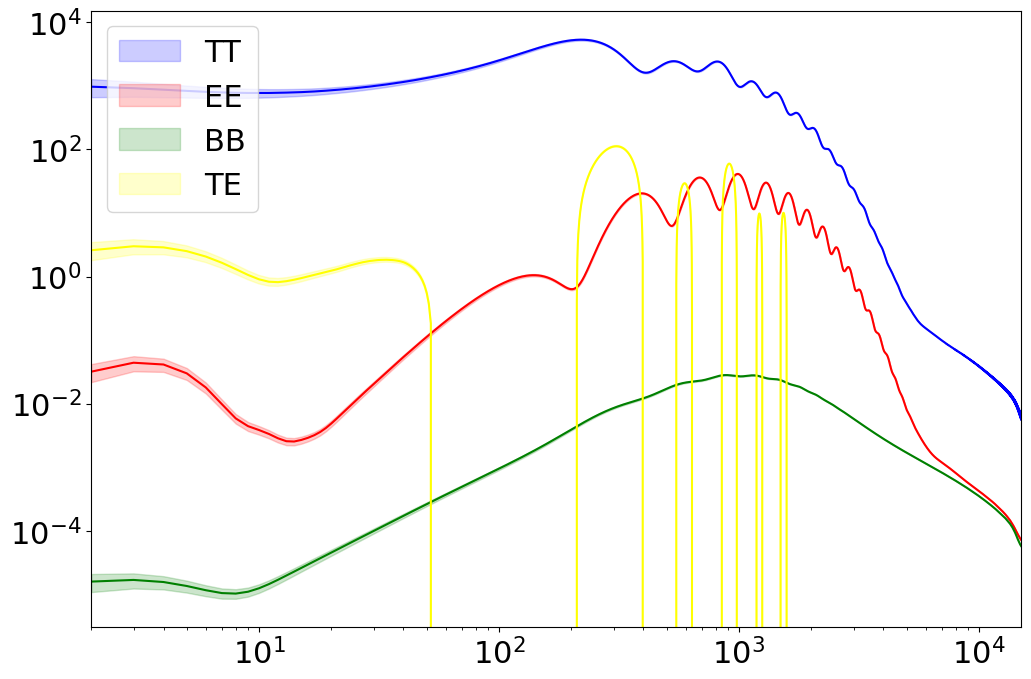

Done in 57.44 s.

Corr matrix


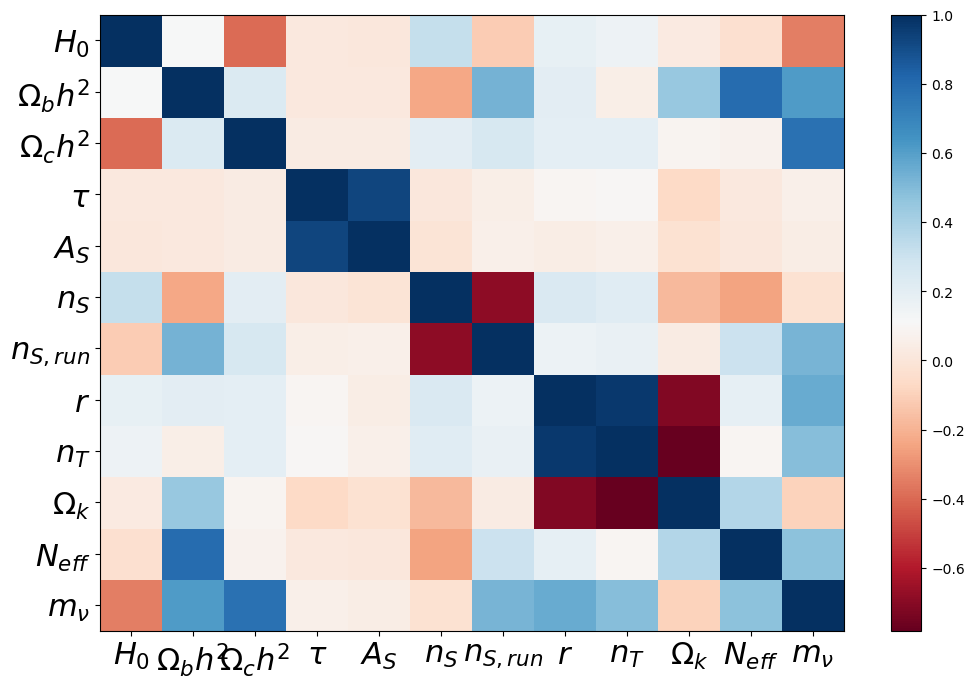


Marginal
H0	8.86e-02
ombh2	8.18e-06
omch2	1.12e-04
tau	1.04e-03
As	3.80e-12
ns	4.61e-04
nsrun	2.62e-04
r	2.45e-04
nt	1.00e-01
omk	1.07e-04
Neff	4.92e-03
mnu	1.76e-03

Conditional
H0	2.39e-03
ombh2	1.97e-06
omch2	2.49e-06
tau	2.72e-05
As	4.35e-14
ns	1.41e-05
nsrun	1.35e-05
r	9.34e-05
nt	3.81e-02
omk	1.07e-05
Neff	2.08e-04
mnu	7.09e-05

Corner


<Figure size 1600x1000 with 0 Axes>

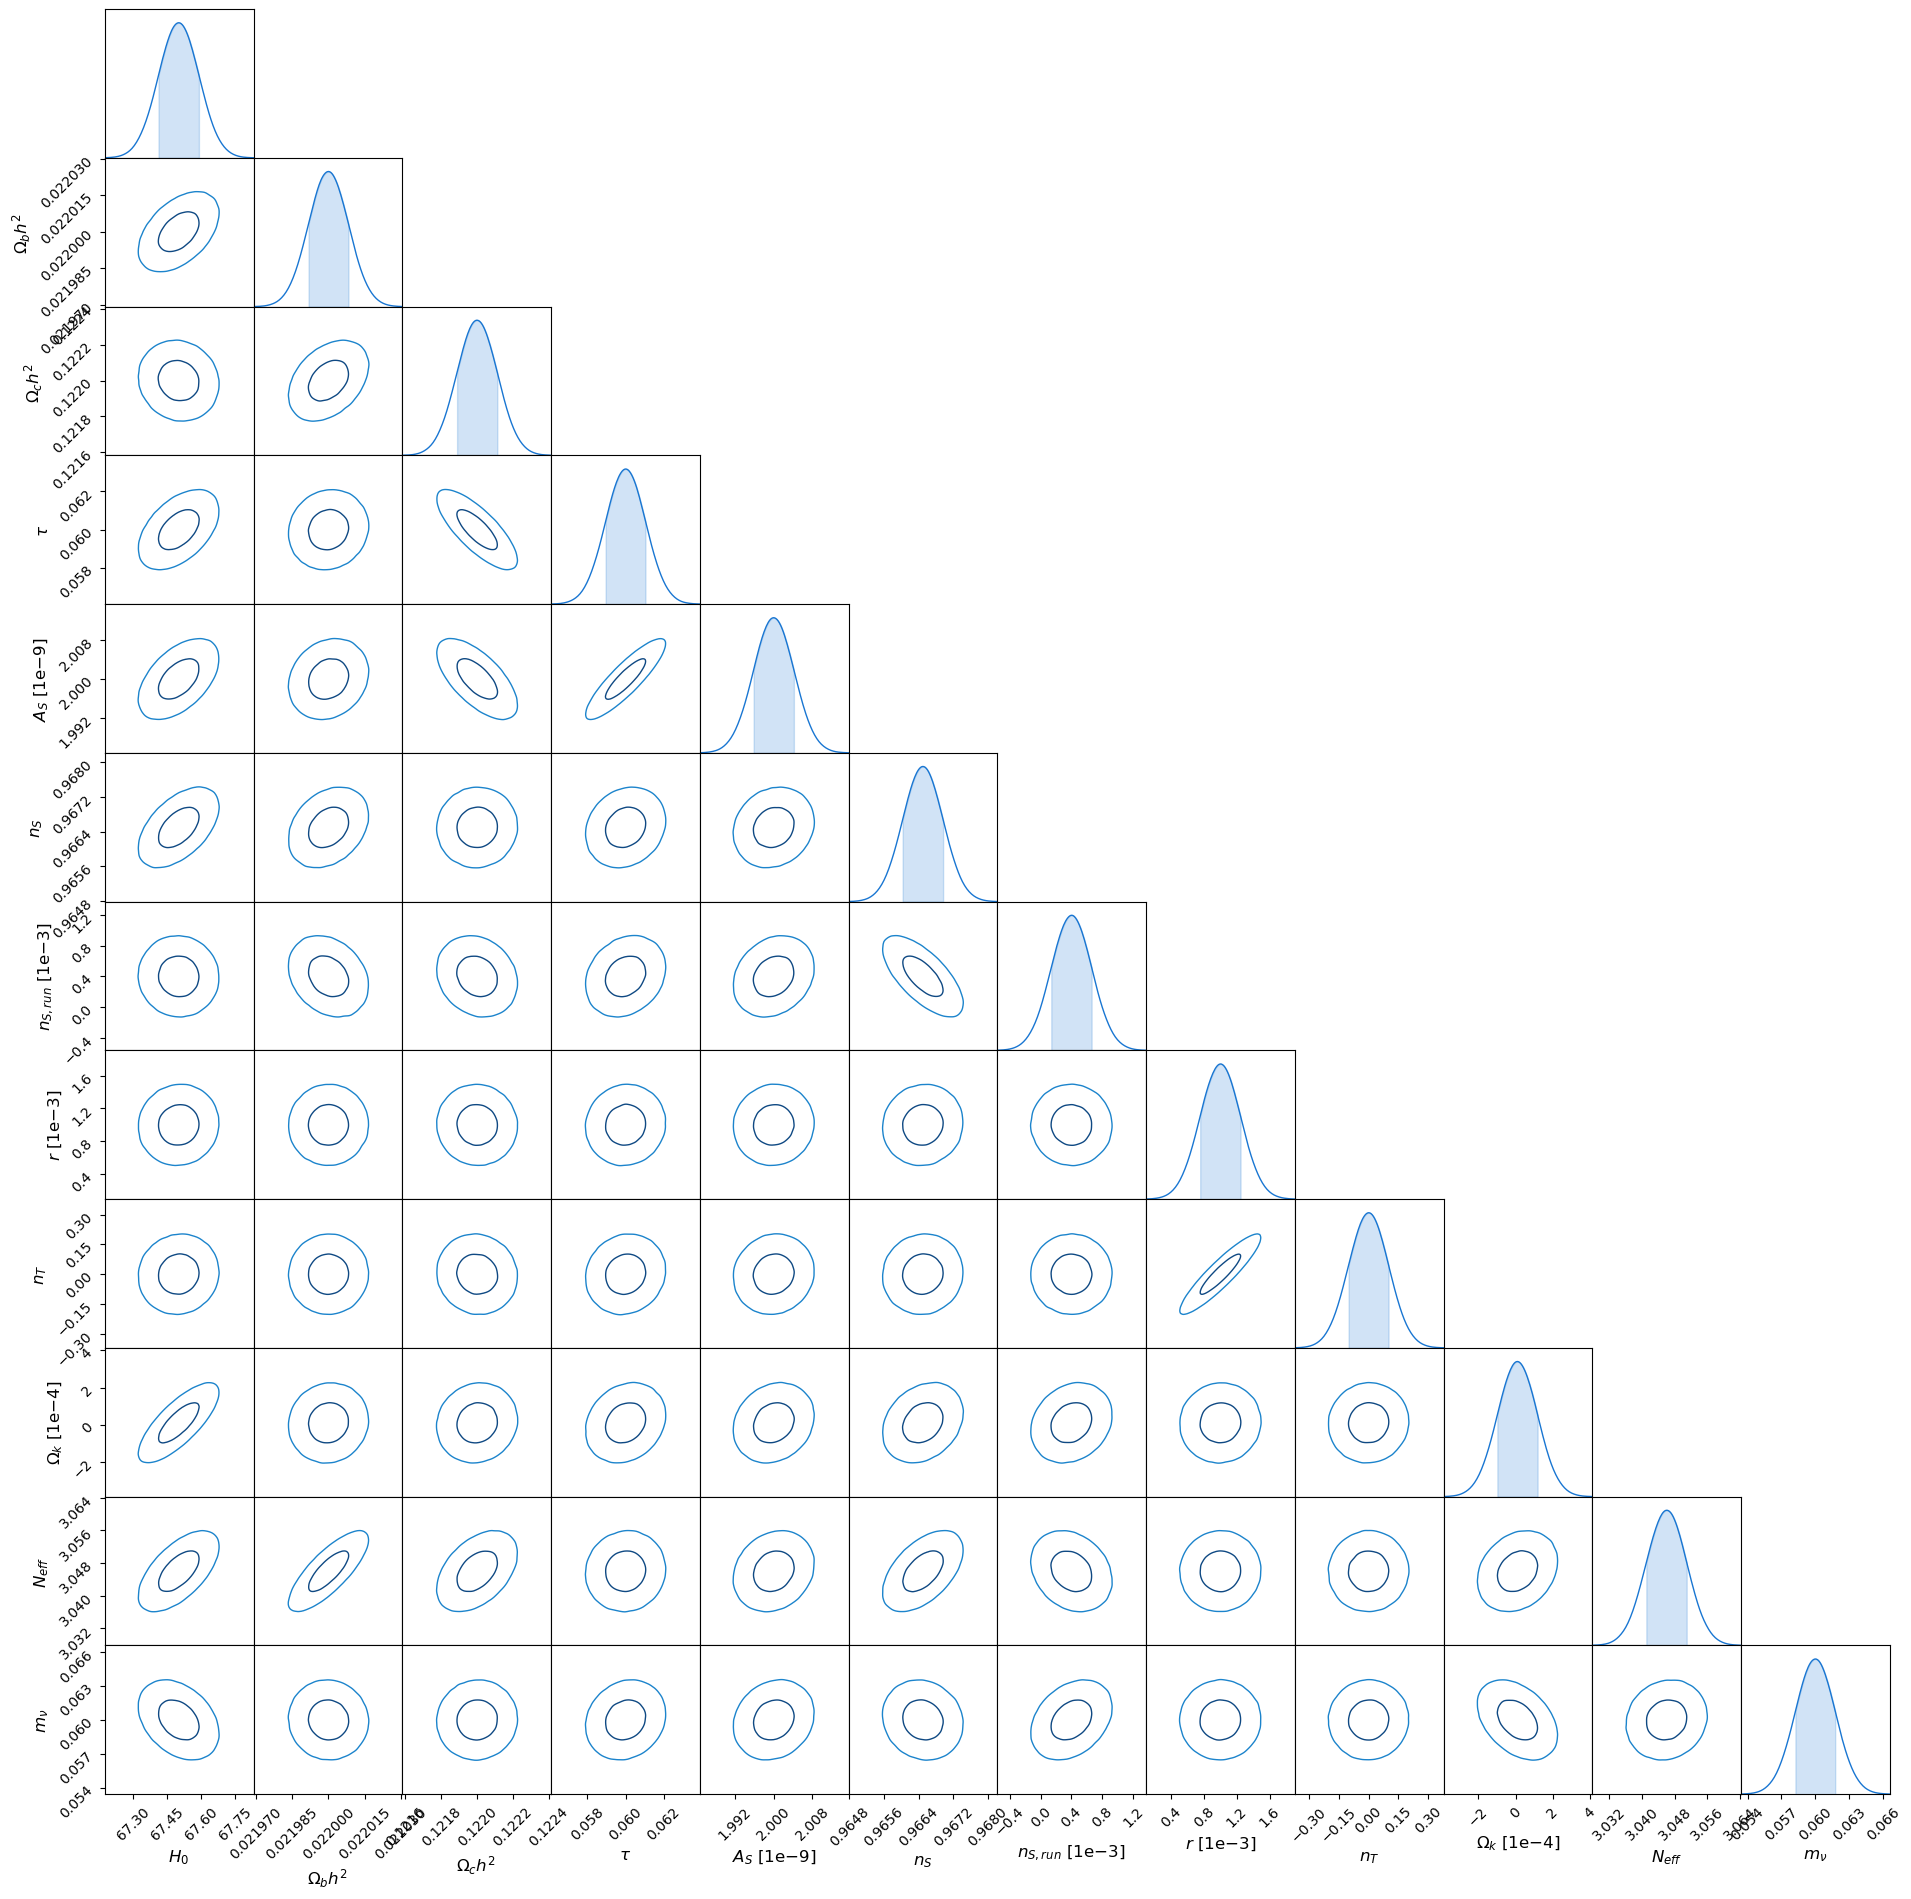

In [4]:
print_res(dic_fid,
          params = ['H0', 'ombh2', 'omch2', 'tau', 'As', 'ns', 'nsrun', 'r', 'nt', 'omk', 'Neff', 'mnu',],
          mode = [0,1,2,3],
          dic_fskys={0:1, 1:1, 2:1, 3:1},
          lensing = 0.3,
          lmax=15000,
          theta_nu=None,
          sensitivity_nu_T=None,
          sensitivity_nu_P=None,
          verbose = True, 
          residual_fg = False)

### In 2100: No noise, very delensed, full sky, lmax=25000

Fisher forecast assuming:

Fiducial:	As = 2e-09, ns = 0.9665, r = 0.001, H0 = 67.5, ombh2 = 0.022, omch2 = 0.122, mnu = 0.06, omk = 1e-05, nt = -0.000125, tau = 0.06, nsrun = 0.0004, Neff = 3.046, 
Parameters:	H0, ombh2, omch2, tau, As, ns, nsrun, r, nt, omk, Neff, mnu, 
Modes:		TT, 	EE, 	BB, 	TE, 
fsky:		1, 	1, 	1, 	1, 
lmax:		25000,
Delensing:	1e-08,
Noise level:	


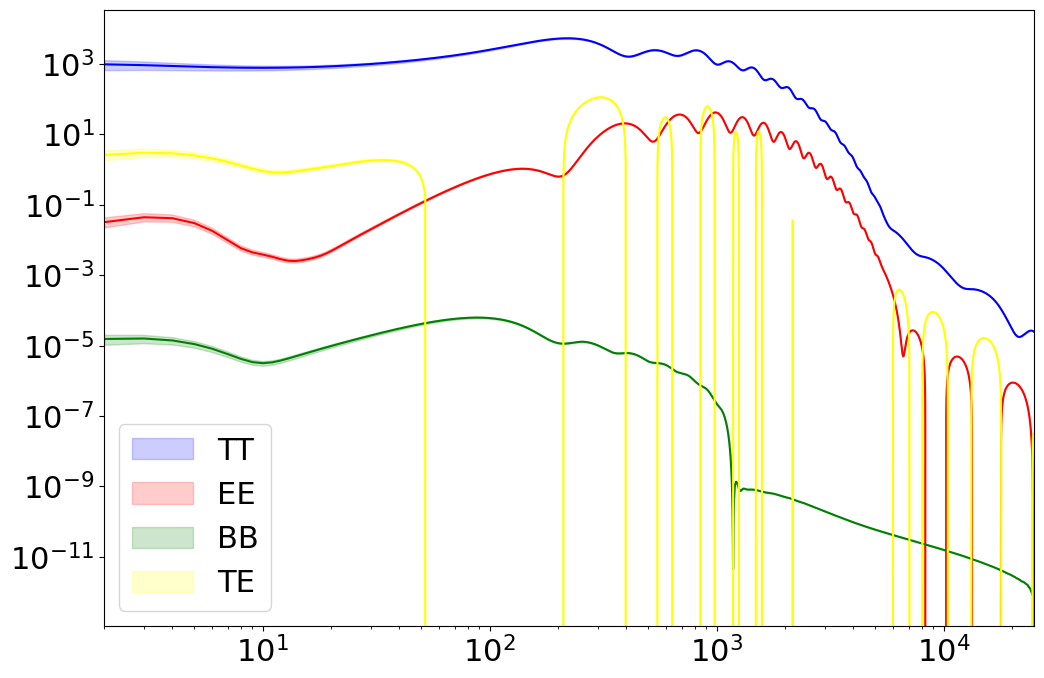

Done in 86.22 s.

Corr matrix


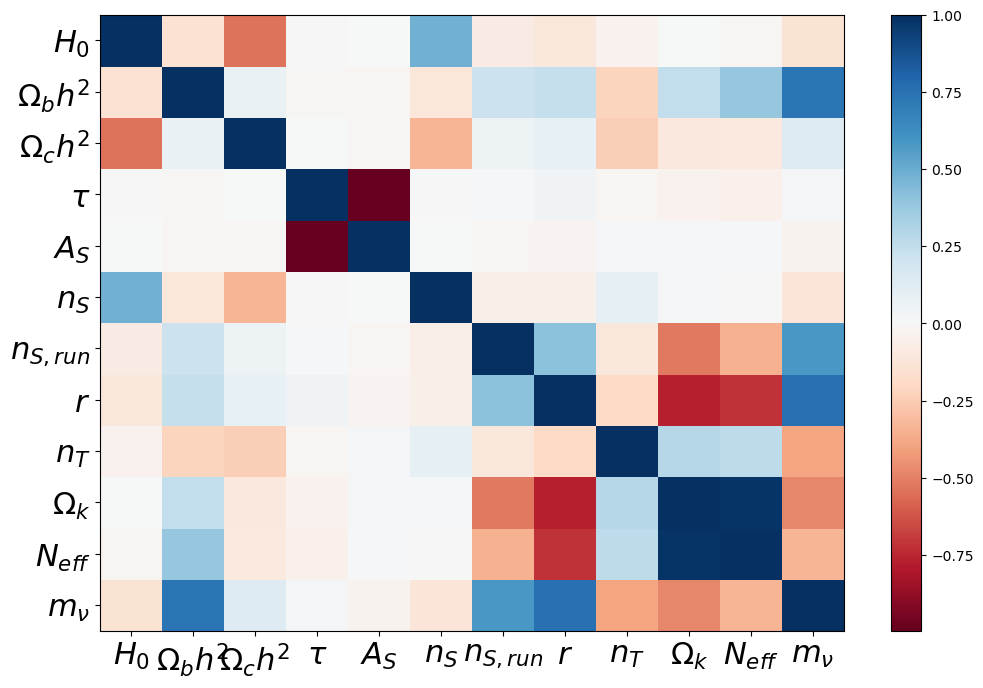


Marginal
H0	2.10e-03
ombh2	4.80e-07
omch2	5.07e-06
tau	1.71e-05
As	1.06e-13
ns	8.93e-06
nsrun	1.51e-09
r	1.23e-06
nt	2.51e-03
omk	4.16e-09
Neff	1.49e-04
omgwh2	8.37e-10
mnu	5.73e-09

Conditional
H0	2.31e-06
ombh2	9.50e-09
omch2	7.68e-09
tau	1.23e-05
As	3.50e-14
ns	3.95e-07
nsrun	1.31e-09
r	1.05e-07
nt	2.13e-04
omk	2.75e-09
Neff	1.85e-07
omgwh2	1.03e-12
mnu	4.27e-09

Corner


<Figure size 1600x1000 with 0 Axes>

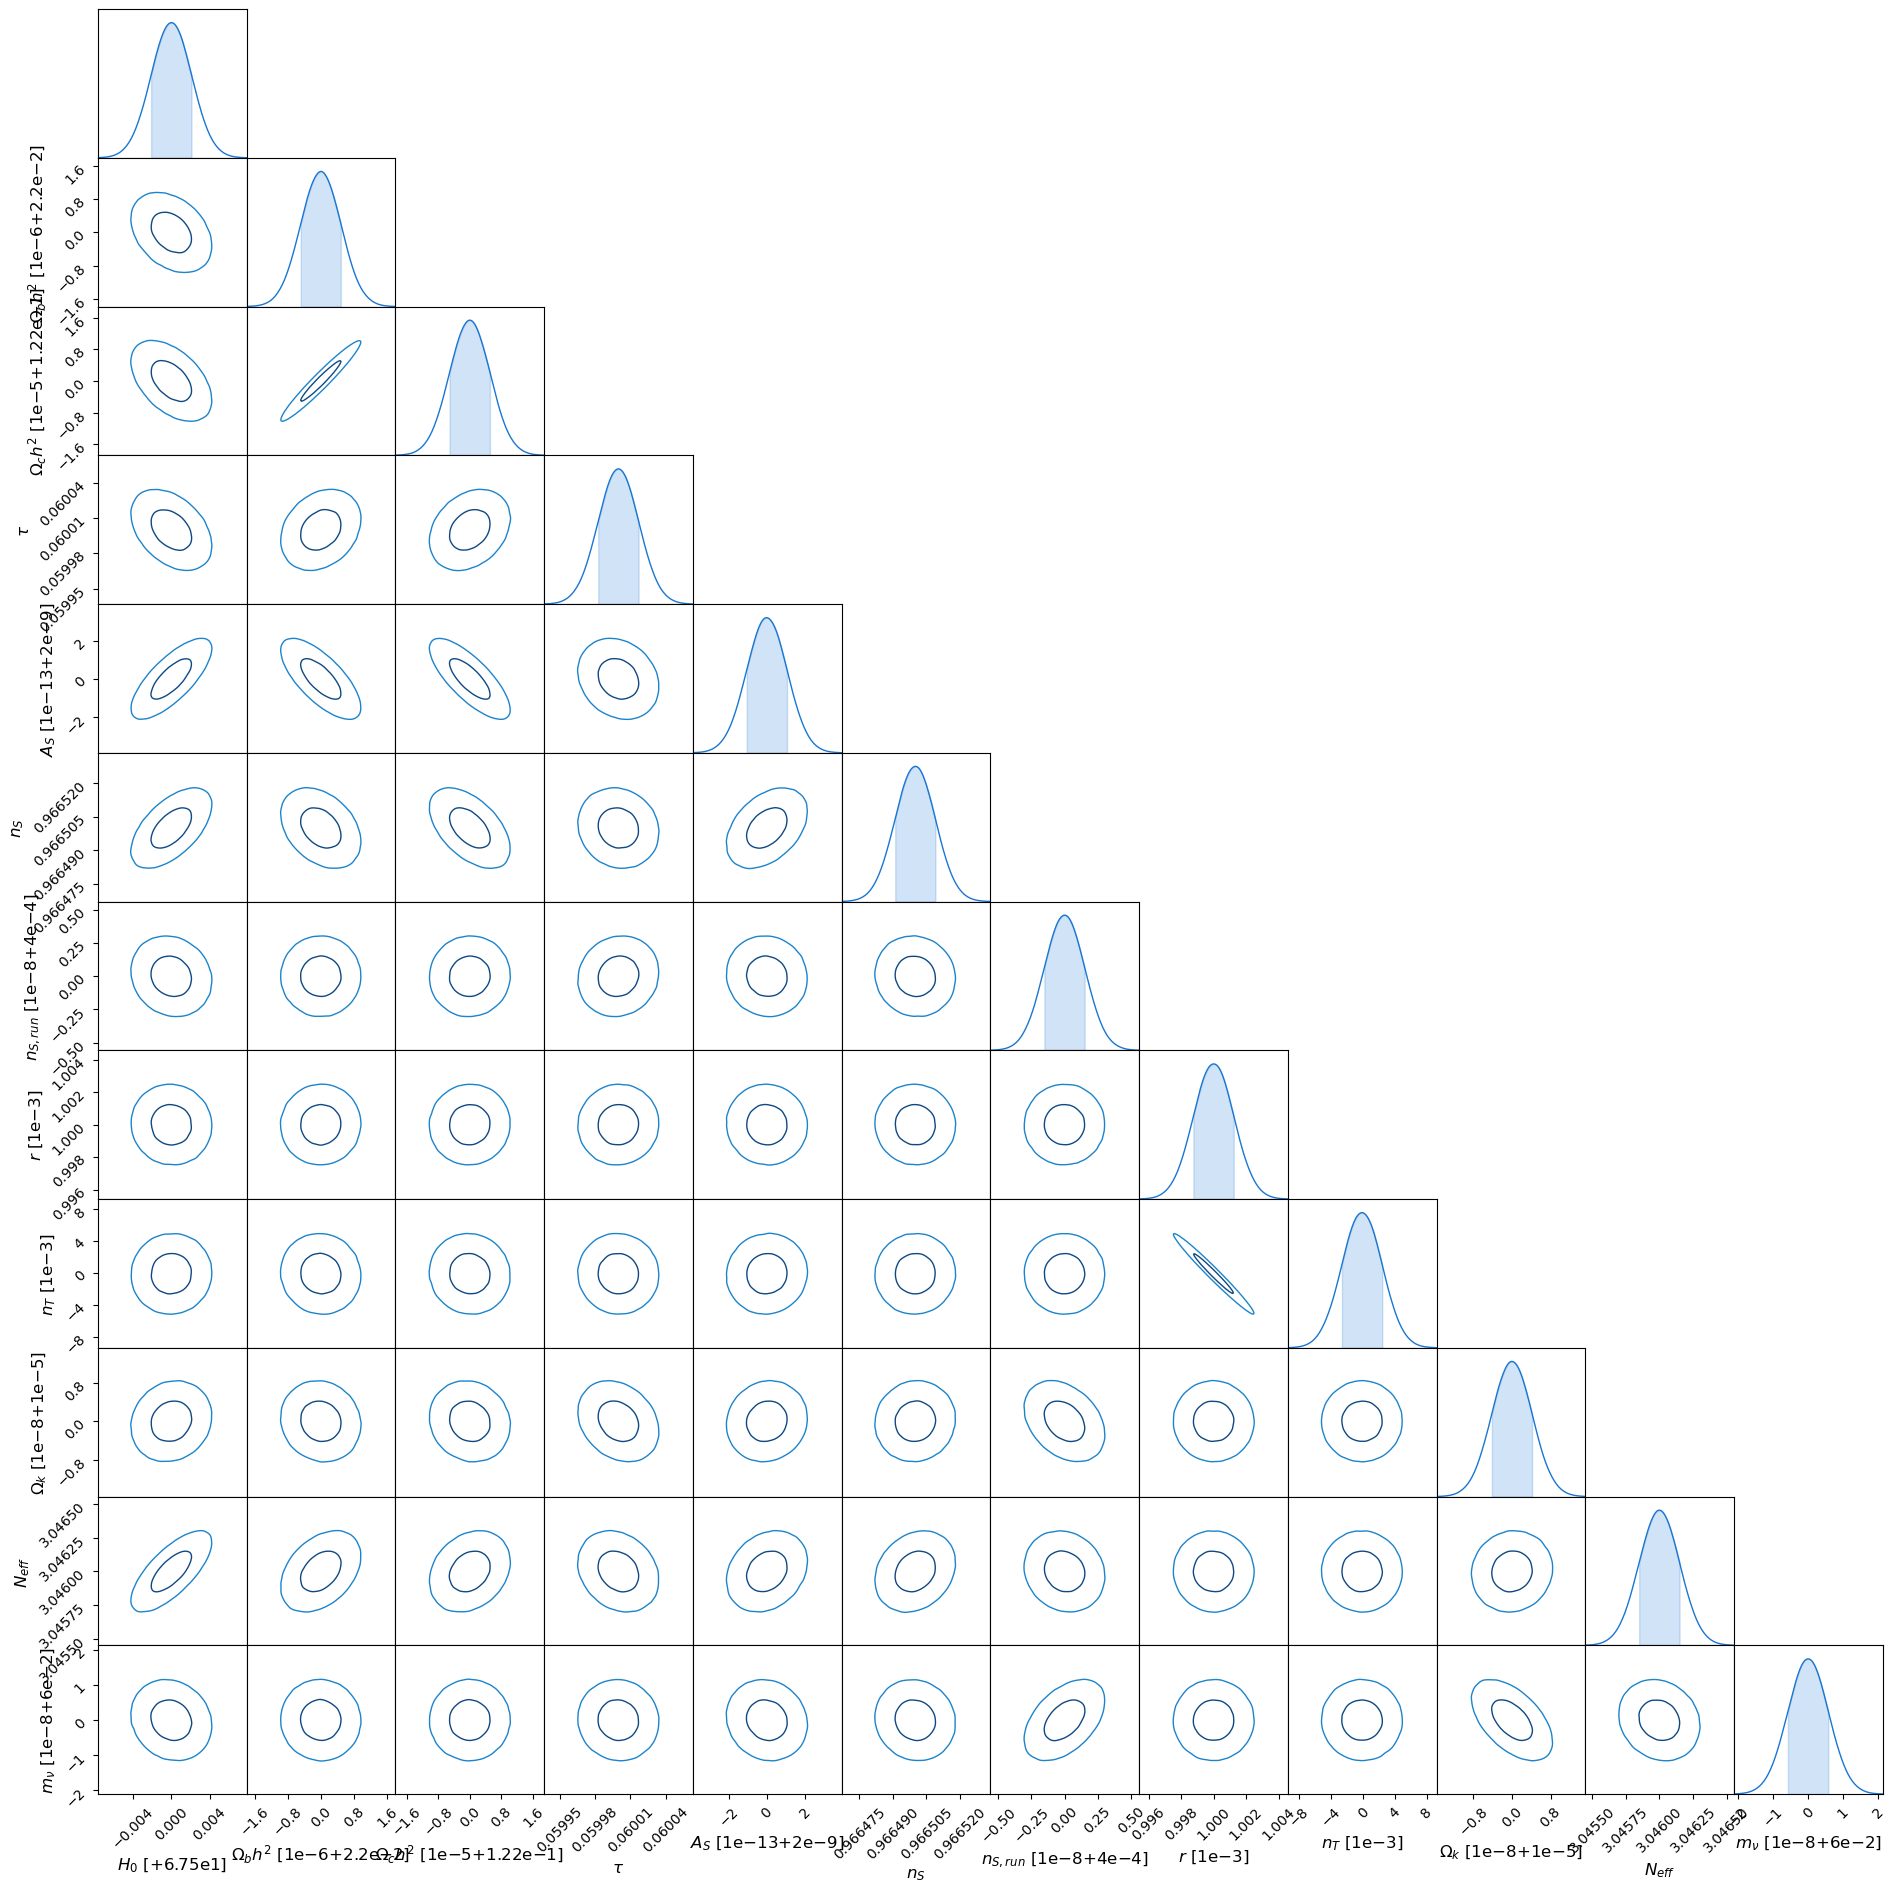

In [7]:
print_res(dic_fid,
          params = ['H0', 'ombh2', 'omch2', 'tau', 'As', 'ns', 'nsrun', 'r', 'nt', 'omk', 'Neff', 'mnu',],
          mode = [0, 1, 2, 3],
          dic_fskys={0:1, 1:1, 2:1, 3:1},
          lensing = 1e-8,
          lmax=25000,
          theta_nu=None,
          sensitivity_nu_T=None,
          sensitivity_nu_P=None,
          verbose = True,
          residual_fg = False)

### LiteBIRD

Fisher forecast assuming:

Fiducial:	As = 2e-09, ns = 0.9665, r = 0.001, H0 = 67.5, ombh2 = 0.022, omch2 = 0.122, mnu = 0.06, omk = 1e-05, nt = -0.000125, tau = 0.06, nsrun = 0.0004, Neff = 3.046, 
Parameters:	H0, ombh2, omch2, tau, As, ns, nsrun, r, 
Modes:		TT, 	EE, 	BB, 	TE, 
fsky:		1, 	1, 	0.5, 	1, 
lmax:		1000,
Delensing:	0.3,
Noise level:	


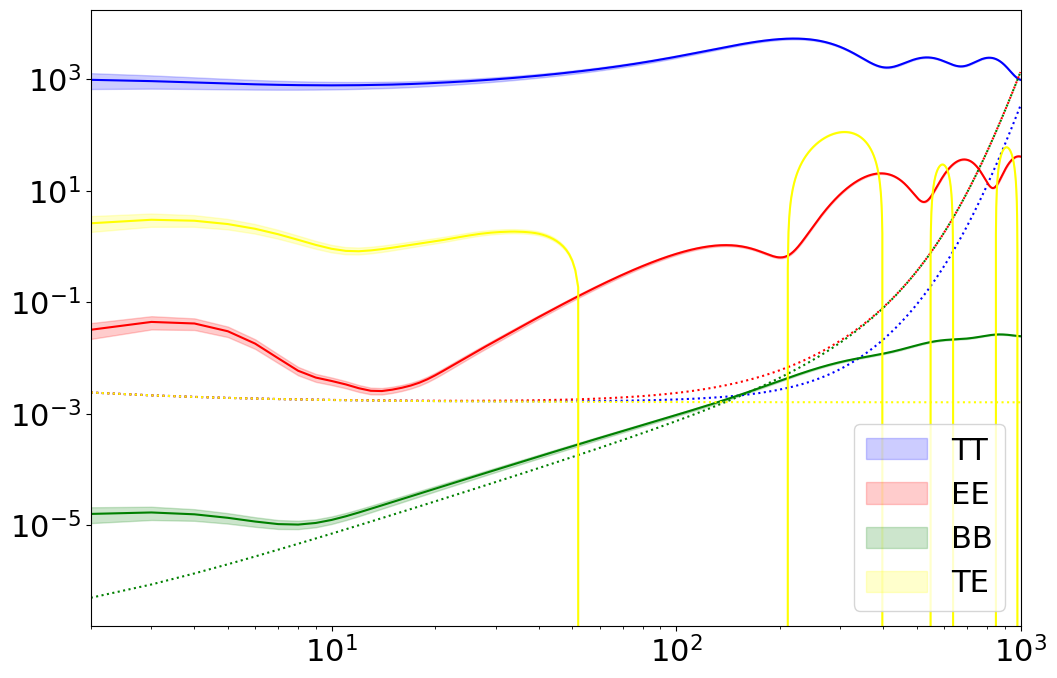

Done in 17.17 s.

Corr matrix


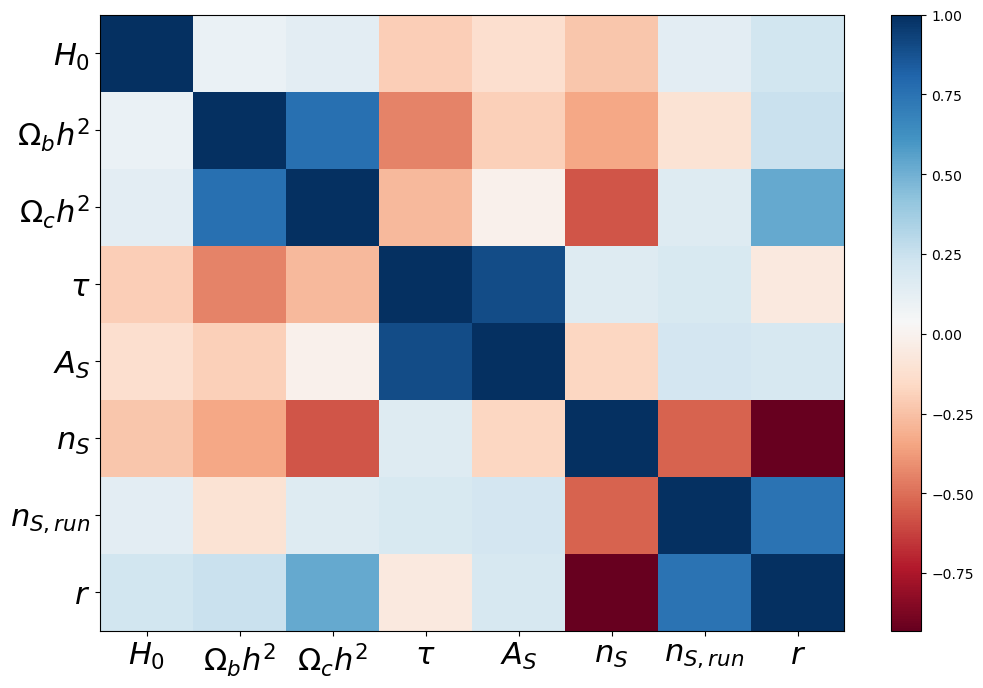


Marginal
H0	3.61e-01
ombh2	1.09e-04
omch2	7.53e-04
tau	2.58e-03
As	1.14e-11
ns	4.53e-03
nsrun	6.25e-03
r	2.97e-04

Conditional
H0	7.68e-02
ombh2	4.84e-05
omch2	1.83e-04
tau	5.77e-04
As	2.35e-12
ns	2.41e-03
nsrun	3.34e-03
r	2.83e-04

Corner


<Figure size 1600x1000 with 0 Axes>

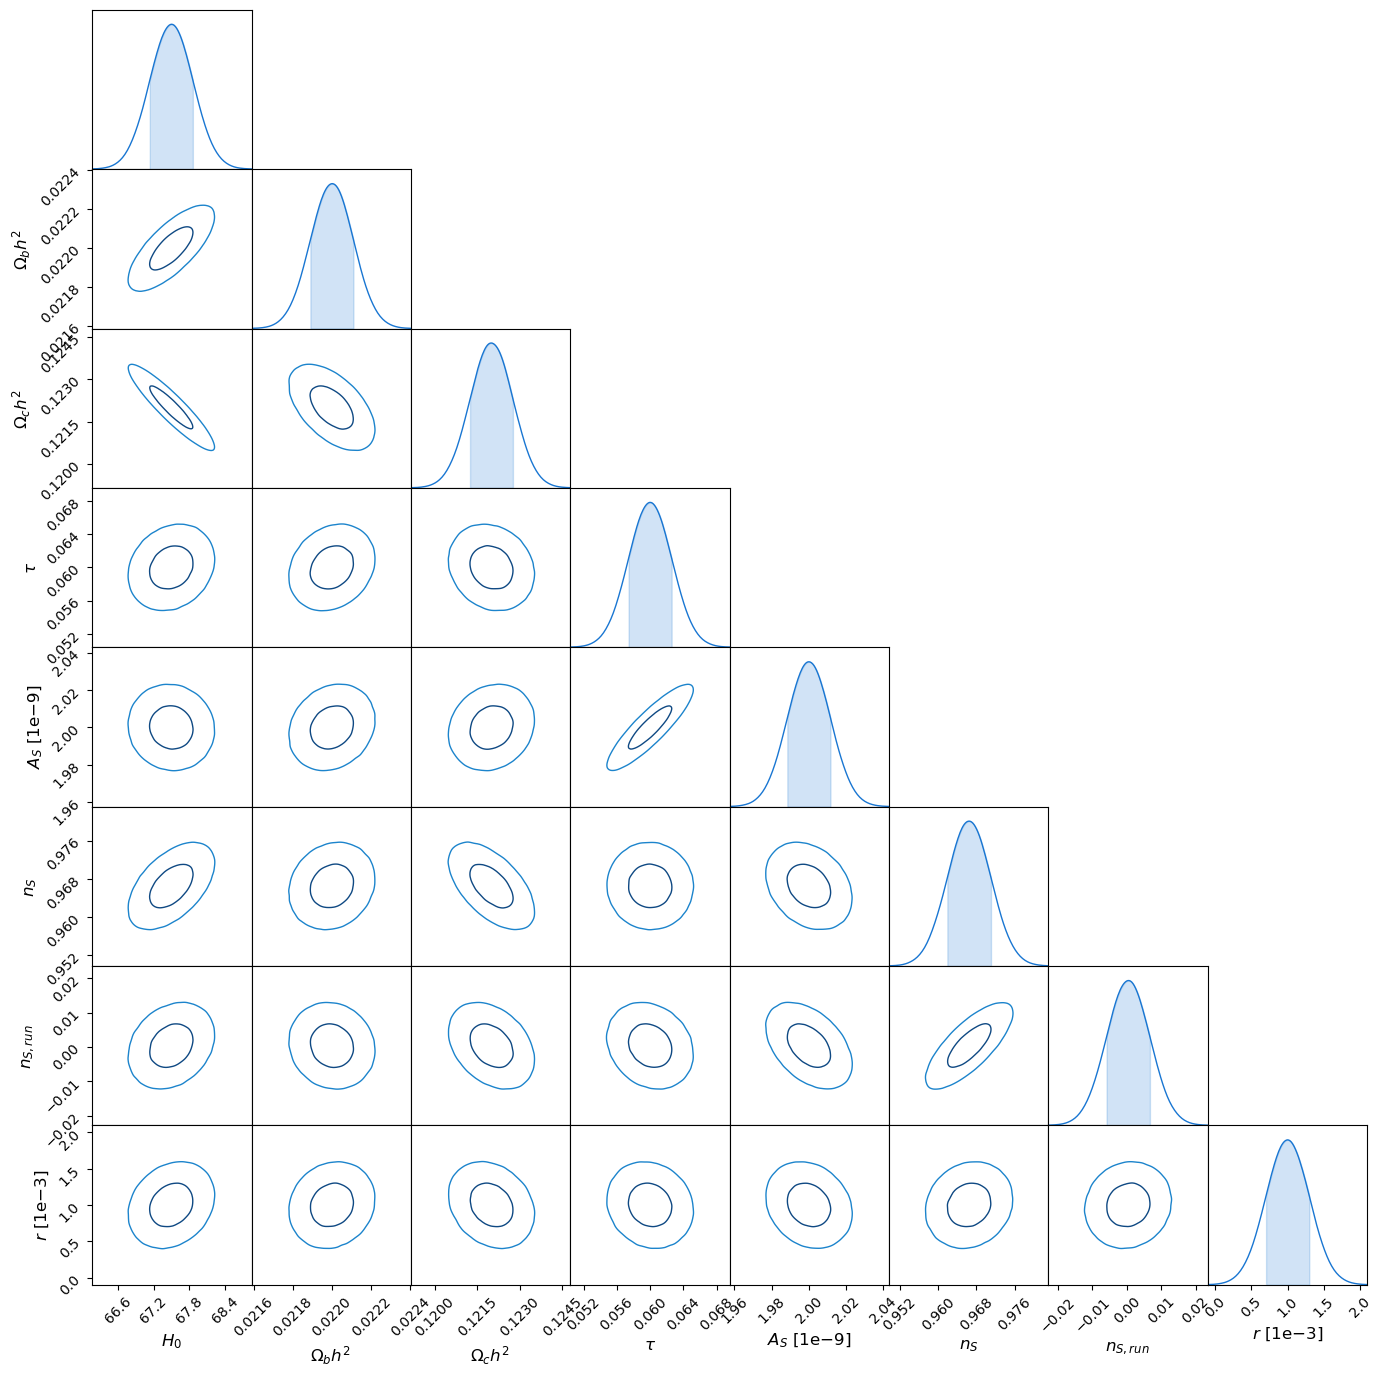

In [34]:
theta_nu = np.array([70.5, 58.5, 51.1, 44, 40, 37, 33.5, 30, 27, 28.9, 28.3, 24.7, 22.5, 20.9, 17.9])
sensitivity_nu_P = np.array([37.42, 33.46, 21.31, 16.87, 12.07, 11.30, 6.56, 4.58, 4.79, 5.57, 5.85, 10.79, 13.80, 21.95, 47.45])
sensitivity_nu_T = sensitivity_nu_P/2

print_res(dic_fid,
          params = ['H0', 'ombh2', 'omch2', 'tau', 'As', 'ns', 'nsrun', 'r',],
          mode = [0, 1, 2, 3],
          dic_fskys={0:1, 1:1, 2:0.5, 3:1},
          lensing = 0.3,
          lmax=1000,
          theta_nu=theta_nu,
          sensitivity_nu_T=sensitivity_nu_T,
          sensitivity_nu_P=sensitivity_nu_P,
          verbose = True,
          residual_fg = True)


### Planck

Fisher forecast assuming:

Fiducial:	As = 2e-09, ns = 0.9665, r = 0.001, H0 = 67.5, ombh2 = 0.022, omch2 = 0.122, mnu = 0.06, omk = 1e-05, nt = -0.000125, tau = 0.06, nsrun = 0.0004, Neff = 3.046, 
Parameters:	H0, ombh2, omch2, tau, As, ns, 
Modes:		TT, 	EE, 	BB, 	TE, 
fsky:		0.78, 	0.78, 	0.78, 	78, 
lmax:		3000,
Delensing:	1,
Noise level:	


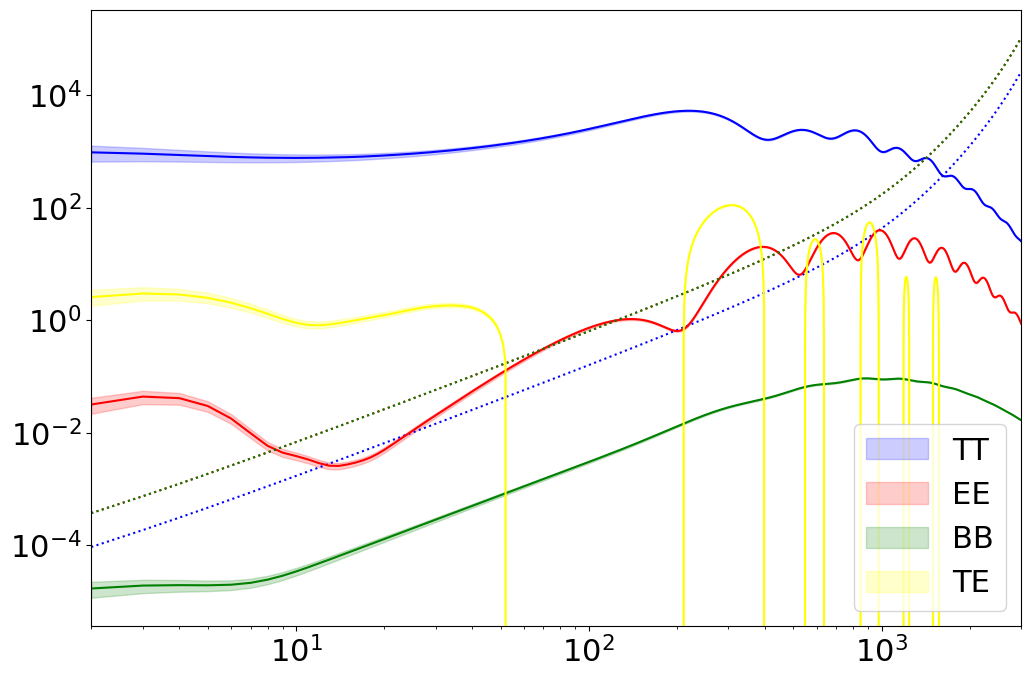

Done in 17.46 s.

Corr matrix


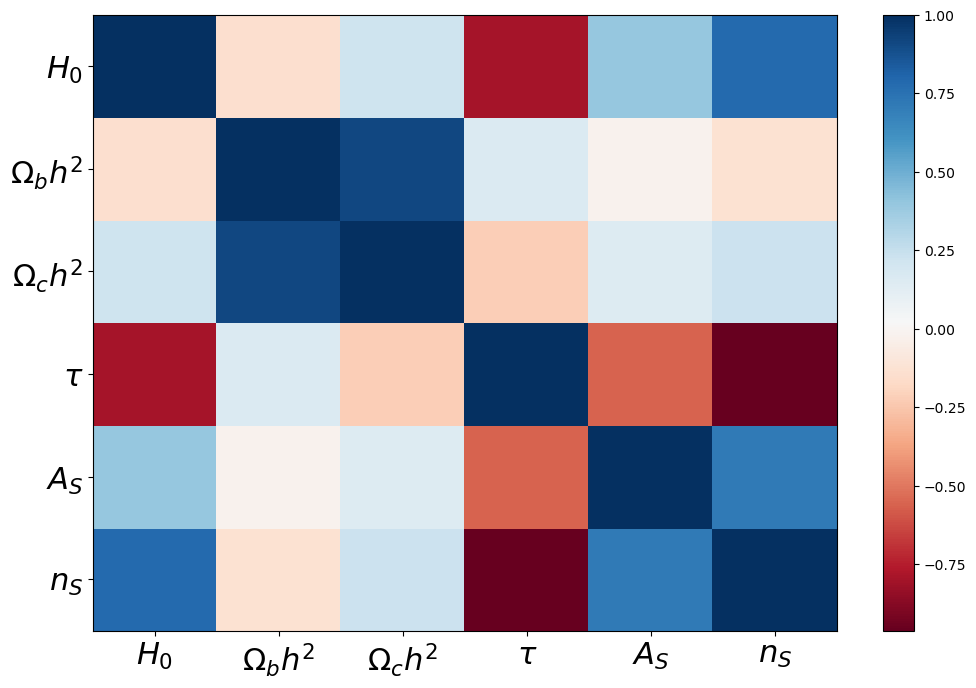


Marginal
H0	6.29e-01
ombh2	1.47e-04
omch2	1.43e-03
tau	4.55e-03
As	1.81e-11
ns	3.79e-03

Conditional
H0	9.75e-02
ombh2	7.37e-05
omch2	2.25e-04
tau	5.79e-04
As	2.33e-12
ns	1.73e-03

Corner


<Figure size 1600x1000 with 0 Axes>

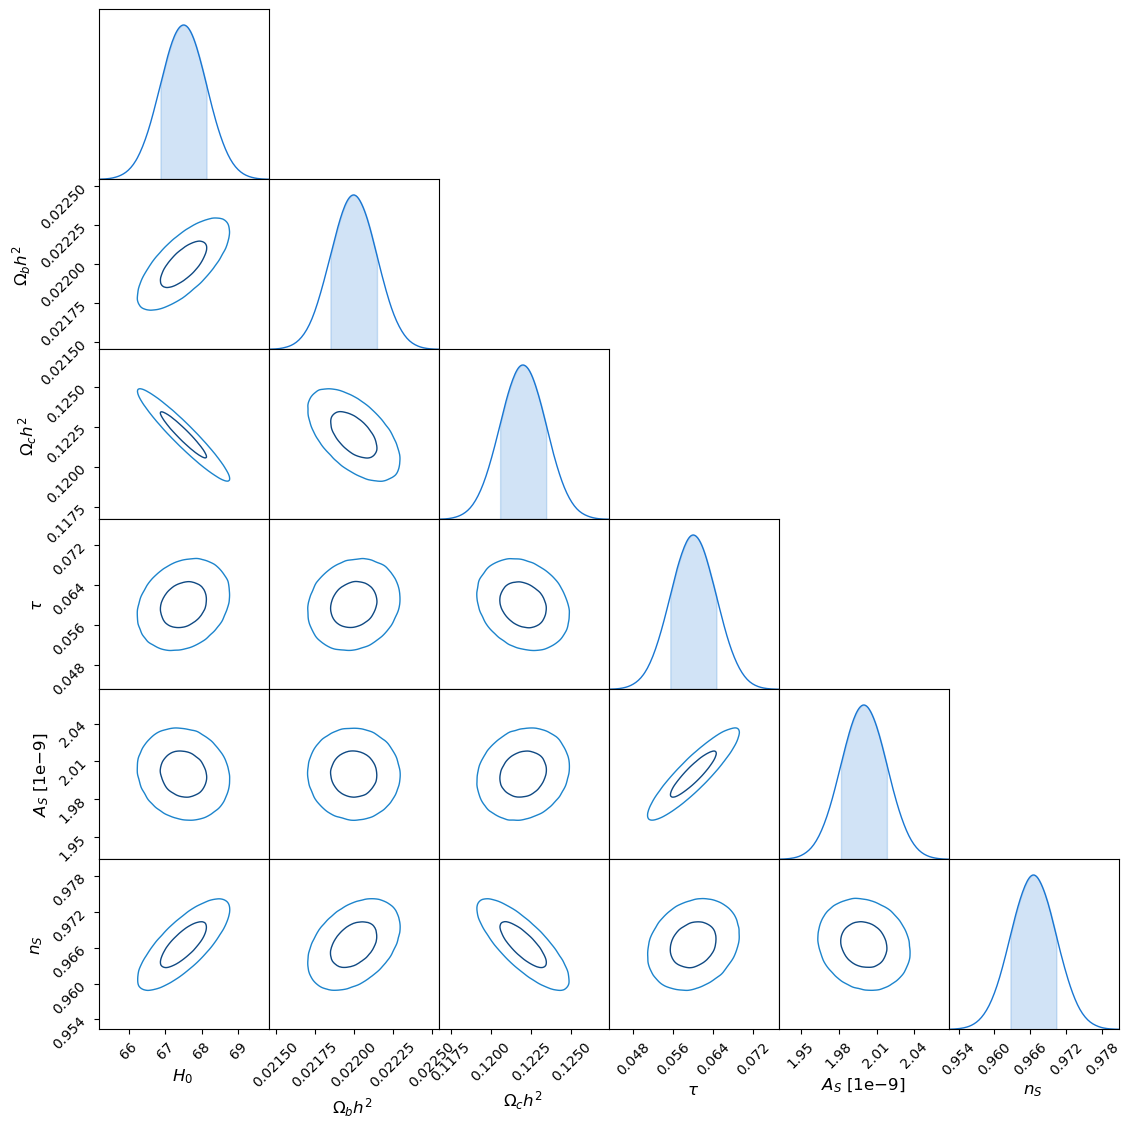

In [5]:
theta_nu = np.array([33, 24, 14, 9.5, 7.1, 5, 5, 5, 5])
sensitivity_nu_T = np.array([170, 200, 270, 50, 62, 91, 277, 1998, 91000])
sensitivity_nu_P = 2*sensitivity_nu_T
print_res(dic_fid,
          params = ['H0', 'ombh2', 'omch2', 'tau', 'As', 'ns'],
          mode = [0, 1, 2, 3],
          dic_fskys={0:0.78, 1:0.78, 2:0.78, 3:78},
          lensing = 1,
          lmax=3000,
          theta_nu=theta_nu,
          sensitivity_nu_T=sensitivity_nu_T,
          sensitivity_nu_P=sensitivity_nu_P,
          verbose = True,
          residual_fg = False)

# preliminary tests

(8994,) (8994,) (8994,) (8994,)
[-1.2072004   0.86642379 -0.02049569 ...  0.78504231  0.80152733
  0.18674746]


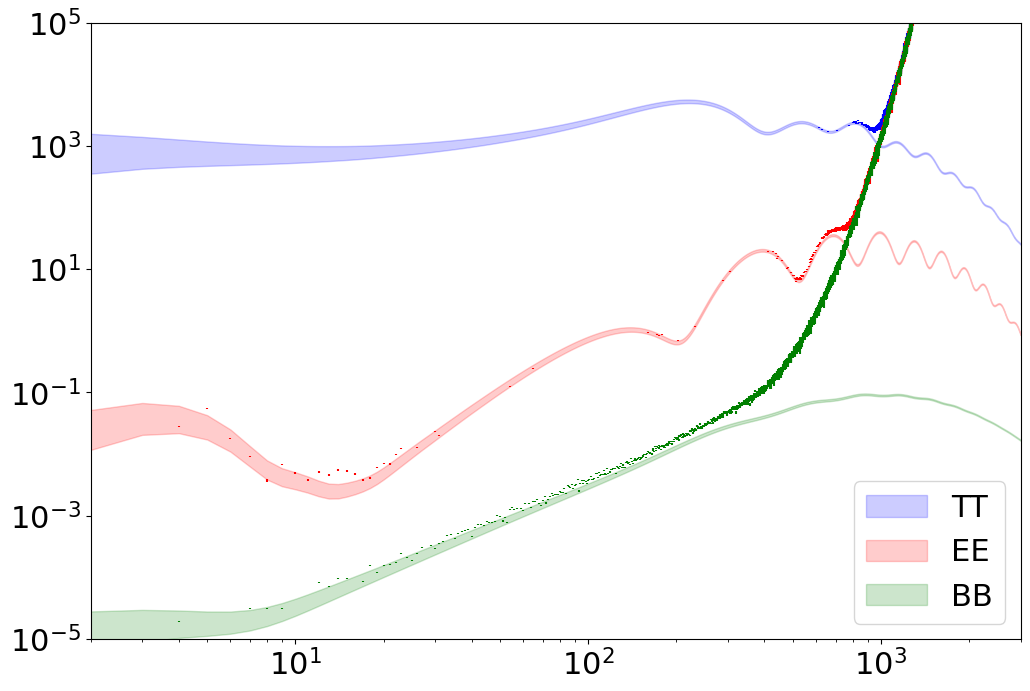

In [18]:
def generate_data(As=2e-9, ns=0.9665, r=0.001, H0=67.5, ombh2=0.022, omch2=0.122, mnu=0.06, omk=0.00001, nt=-0.001/8, tau=0.06, nsrun=1e-4, Neff=3.046,  lmax=3000, lensing=1, mode = [0,1,2,3], dic_fskys={0:1, 1:1, 2:1, 3:1}):
    
    l=np.arange(2, lmax)
    n = len(l)
    tic = time()
    Biaisl = np.concatenate([residual_guess(l, sensitivity_nu, theta_nu, mode_) for mode_ in mode])
    sigmaNoisel = Biaisl/10
    Cl_fid = np.ravel(spectra(As, ns, r, H0, ombh2, omch2, mnu, omk, nt, tau, nsrun, Neff, lmax, lensing, mode))
    fsky = np.concatenate(([np.full(n, dic_fskys[mode]) for mode in mode]))
    print(np.shape(np.tile(2/(2*l+1), len(mode))), np.shape(Cl_fid), np.shape(fsky), np.shape(Biaisl))
    CosmicNoise = np.sqrt(np.tile(2/(2*l+1), len(mode))*fsky)*(Cl_fid)
    print(np.random.randn(*np.shape(sigmaNoisel)))
    Noisel = np.sqrt(CosmicNoise**2+sigmaNoisel**2) *  np.random.randn(*np.shape(sigmaNoisel)) 
    Cl = Cl_fid + Biaisl + Noisel 

    
    plt.figure()
    for i in range(len(mode)):
        plt.errorbar(l, Cl[i*n:(i+1)*n], sigmaNoisel[i*n:(i+1)*n], color = C[i], ls = 'none')
        plt.fill_between(l, Cl_fid[i*n:(i+1)*n]-np.sqrt(2/(2*l+1)*fsky[i*n:(i+1)*n])*Cl_fid[i*n:(i+1)*n], Cl_fid[i*n:(i+1)*n]+np.sqrt(2/(2*l+1)*fsky[i*n:(i+1)*n])*Cl_fid[i*n:(i+1)*n], color = C[i], alpha=0.2, label=dic_mode[mode[i]])
    plt.loglog()
    plt.xlim(2, lmax+1)
    plt.ylim(1e-5, 1e5)
    plt.legend(fontsize = 22)
    define_plot_resolution()
    plt.show()
    
    return Cl_fid, Cl


Cl_fid, Cl = generate_data(mode = [0,1,2])

def log_gaussian_likelihood(Cl, point, lmax, lensing, mode):
    As, ns, r, H0, ombh2, omch2, mnu, omk, nt, tau, nsrun, Neff = tuple(map(tuple, arr))
    return -0.5*(Cl-np.ravel(spectra(As, ns, r, H0, ombh2, omch2, mnu, omk, nt, tau, nsrun, Neff, lmax, lensing, mode)))

log_likelihood = log_gaussian_likelihood

def mcmc(point_start):
    point = point_start
    n = 1000
    count = 0
    for i in range(n):
        start = time.process_time()
        A6next = A6 + mpmathify('5e-16')*np.random.randn()
        lam6next = lam6 + mpmathify('5e-18')*np.random.randn()
        mphinext = mphi + mpmathify('5e-17')*np.random.randn()
        ns_next = ns_v2(lambda phi : Vrge(phi, 1, mphinext, A6next, lam6next))
        p = np.exp(log_likelihood(ns_next))/np.exp(log_likelihood(ns))
        p_or_1 = min(p, 1)
        if np.random.uniform(0,1) < p_or_1:
            print('\n'+str(ns)+' to '+str(ns_next)+' of proba '+str(p_or_1)+' accepted.')
            A6, lam6, mphi, ns = A6next, lam6next, mphinext, ns_next
        else:  
            print('\n'+str(ns)+' to '+str(ns_next)+' of proba '+str(p)+' refused.')
        A6_list.append(A6)
        lam6_list.append(lam6)
        mphi_list.append(mphi)
        ns_list.append(ns)
        time_step = time.process_time() - start
        time_step_list.append(time_step)
        count+=1
        print("step "+ str(count) +"/"+str(n)+" took "+str(time_step) +" sec.\n")
        
    return mphi_list, A6_list, lam6_list, ns_list, time_step_list

# test LFI

In [ ]:
Mp = np.exp(42.334)
tp = 5.391248e-44
kpc2m = 3.085677e19
M = Mp*(24*np.pi**2*eps1)

def find_DeltaNstar(lnRrad, M, DeltaNstar):
    HubbleSquareRootOf3OmegaRad = 100/kpc2m*tp**np.sqrt(3*4.1837e-5)*np.sqrt(8*np.pi)
    kstar, lnMpcToKappa, HubbleSquareRootOf3OmegaRad, RelatDofRatio = 0.05, 130.282, 7.5437e-63, 427/4/2
    N0 = log(kstar) - lnMpcToKappa - 0.5*np.log(HubbleSquareRootOf3OmegaRad) - 0.25*np.log(RelatDofRatio)
    eps1star = p/(4*(DeltaNstar+p/4))
    eps1end = 1
    vstar = (2*p*(DeltaNstar+p/4))**(p/2)
    vend = (p/np.sqrt(2))**p
    return lnRrad - N0 - 0.25*np.log(9/eps1star/(3-eps1end)*vend/vstar)+0.25*np.log(M**4/Mp**4*vstar/eps1star/3)

plt.figure()

define_plot_resolution()